# INFO 5604: Homework 4: SVM
Josh Gregory

## Canvas Assignment Instructions

**Step 1:** Download data files.

**Step 2:** Go to https://coding.csel.ioLinks and select the ""INFO 4604/5604 Applied ML" coding environment. 

**Step 3:** Upload the files, which you downloaded in Step 1, to JupyterLab, in the same folder.

**Step 4:** Create a new .ipynb file named YourIdentikey_HW4.ipynb in JupyterLab. 

For HW 4, use the roadmap for building machine learning systems and the sklearn library, train a SVM algorithm (use both kernels: linear and rbf).  For full credit perfrom steps similar to ICHW 4 (SVM, step 1 - 6 cleary marked and annotated) in your .ipynb.

Answer the following questions: How does the maximum margin better generalize the SVM algorithm?

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy
sns.set() 

## EDA

### 1. Read in the data set and perform preliminary checks

In [2]:
digits = pd.read_csv('digits_8K.csv')

print(digits)

      label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0         7    0    0    0    0    0    0    0    0    0  ...      0      0   
1         2    0    0    0    0    0    0    0    0    0  ...      0      0   
2         1    0    0    0    0    0    0    0    0    0  ...      0      0   
3         0    0    0    0    0    0    0    0    0    0  ...      0      0   
4         4    0    0    0    0    0    0    0    0    0  ...      0      0   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
8031      2    0    0    0    0    0    0    0    0    0  ...      0      0   
8032      3    0    0    0    0    0    0    0    0    0  ...      0      0   
8033      4    0    0    0    0    0    0    0    0    0  ...      0      0   
8034      5    0    0    0    0    0    0    0    0    0  ...      0      0   
8035      5    0    0    0    0    0    0    0    0    0  ...      0      0   

      28x21  28x22  28x23  28x24  28x25  28x26  28x

In [3]:
classes = pd.unique(digits['label'])
num_classes = len(classes)
each_class = digits['label'].value_counts()

print(classes)
print(num_classes)
print(each_class)

print(digits.info())

[7 2 1 0 4 9 5 6 3 8]
10
1    909
2    837
9    823
7    816
3    807
4    791
8    791
0    778
6    759
5    725
Name: label, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8036 entries, 0 to 8035
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 48.1 MB
None


In [4]:
print(f'Total samples: {909+837+823+816+807+791+791+778+759+725}')

Total samples: 8036


### Answers to questions

**What are the names of the features?**
Since we're dealing with digits, the features don't really have names. We're instead given an array of pixels that range in intensity of 0-255.

**What are the types of fetures?**
Each pixel value is continuous from 0-255.

**How many samples do we have?**
There are 8036 total samples
    
**How many features do we have?**
Since each digit is an array that is 28x28, there are 28x28=784 total features.

**What are the classes?**
The classes are the digits from 0-9.

**How many classes do we have?**
10, digits from 0-9.
    
    
**How many samples of each class? are they balanced?**
0    778
1    909
2    837
3    807
4    791
5    725
6    759
7    816
8    791
9    823


Because some classes have more than others (i.e. the label of 1 has more than 0), these classes are not balanced.

### 2. Check missing values, outliers and statistics

In [5]:
digits.isna().apply(pd.value_counts)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
False,8036,8036,8036,8036,8036,8036,8036,8036,8036,8036,...,8036,8036,8036,8036,8036,8036,8036,8036,8036,8036


### Answers to questions

**Are there any missing values?**
No. Since the previous line returned `False`, there are no values that are missing. Therefore, nothing needs to be done. To get rid of outliers.

**Are there anomolies in the statistics?**
No. Each pixel can range from 0-255, so there aren't any anomolies. We can also see this from the next cell below.

**Are there outliers?**
No. Each pixel can range from 0-255, so there can't be any outliers.

**Note**: I didn't make a boxplot since there would be 784 boxplots, which is a bit excessive and doesn't really show us anything helpful.

In [6]:
digits.describe().T

,count,mean,std,min,25%,50%,75%,max
label,8036.0,4.454206,2.897591,0.0,2.0,4.0,7.0,9.0
1x1,8036.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1x2,8036.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1x3,8036.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1x4,8036.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
28x24,8036.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
28x25,8036.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
28x26,8036.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
28x27,8036.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


### 3. Check distributions and coorelations

It doesn't really make sense to do this step, since digits are only going to be correlated with the same digit.

On top of that, when trying to run the `sns.pairplot` and `sns.heatmap` commands, the notebook doesn't have enough computing resources.

## SVM Implementation

1. Read in the digits into feature and target/label arrays

In [7]:
X = digits.iloc[:, 1:785]
y = digits.iloc[:, 0]

print(digits)
print(X)
print(y)

      label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0         7    0    0    0    0    0    0    0    0    0  ...      0      0   
1         2    0    0    0    0    0    0    0    0    0  ...      0      0   
2         1    0    0    0    0    0    0    0    0    0  ...      0      0   
3         0    0    0    0    0    0    0    0    0    0  ...      0      0   
4         4    0    0    0    0    0    0    0    0    0  ...      0      0   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
8031      2    0    0    0    0    0    0    0    0    0  ...      0      0   
8032      3    0    0    0    0    0    0    0    0    0  ...      0      0   
8033      4    0    0    0    0    0    0    0    0    0  ...      0      0   
8034      5    0    0    0    0    0    0    0    0    0  ...      0      0   
8035      5    0    0    0    0    0    0    0    0    0  ...      0      0   

      28x21  28x22  28x23  28x24  28x25  28x26  28x

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                            test_size=0.2, random_state=30, stratify=y)

In [9]:
# Check the digits DataFrame

print(X_train)
print(y_train)

      1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  1x10  ...  28x19  28x20  \
2665    0    0    0    0    0    0    0    0    0     0  ...      0      0   
7531    0    0    0    0    0    0    0    0    0     0  ...      0      0   
3424    0    0    0    0    0    0    0    0    0     0  ...      0      0   
4612    0    0    0    0    0    0    0    0    0     0  ...      0      0   
7646    0    0    0    0    0    0    0    0    0     0  ...      0      0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...    ...    ...   
3432    0    0    0    0    0    0    0    0    0     0  ...      0      0   
6725    0    0    0    0    0    0    0    0    0     0  ...      0      0   
2877    0    0    0    0    0    0    0    0    0     0  ...      0      0   
7183    0    0    0    0    0    0    0    0    0     0  ...      0      0   
6903    0    0    0    0    0    0    0    0    0     0  ...      0      0   

      28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  


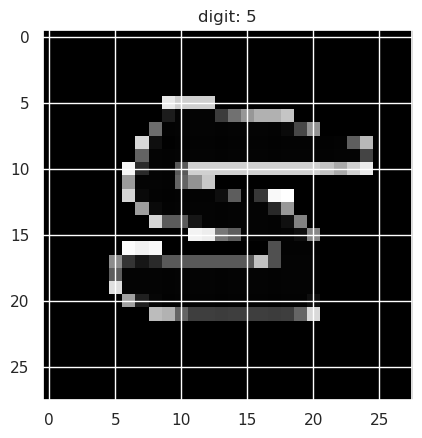

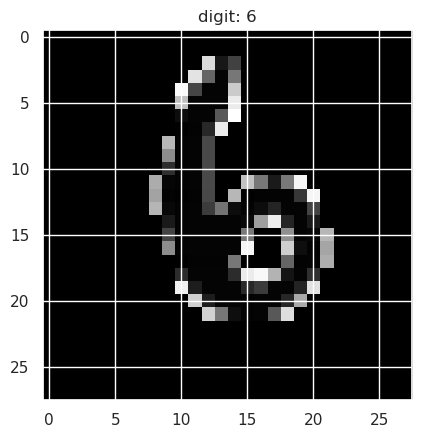

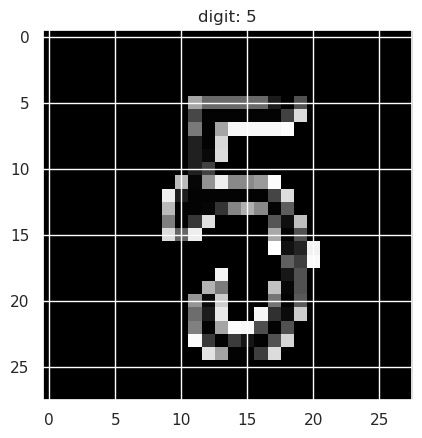

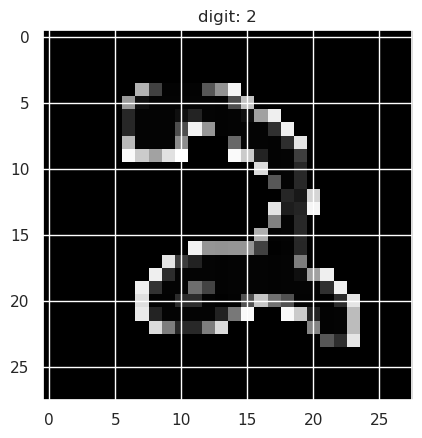

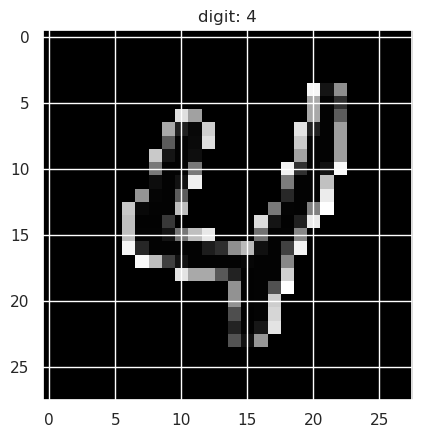

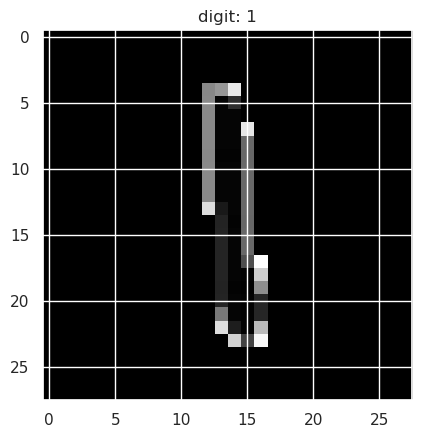

In [10]:
# Check a few digits to make sure they're coming out correctly

for i in (np.random.randint(0,270,6)):
    two_d = (np.reshape(X_test.values[i], (28, 28)) * 255).astype(np.uint8)
    plt.title('digit: {0}'. format(y_test.values[i]))
    plt.imshow(two_d, interpolation='nearest', cmap='gray')
    plt.show()

In [11]:
print(digits['label'].value_counts())

1    909
2    837
9    823
7    816
3    807
4    791
8    791
0    778
6    759
5    725
Name: label, dtype: int64


/tmp/ipykernel_494/2691270319.py:4: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  digit_count = digit_count[:10,]


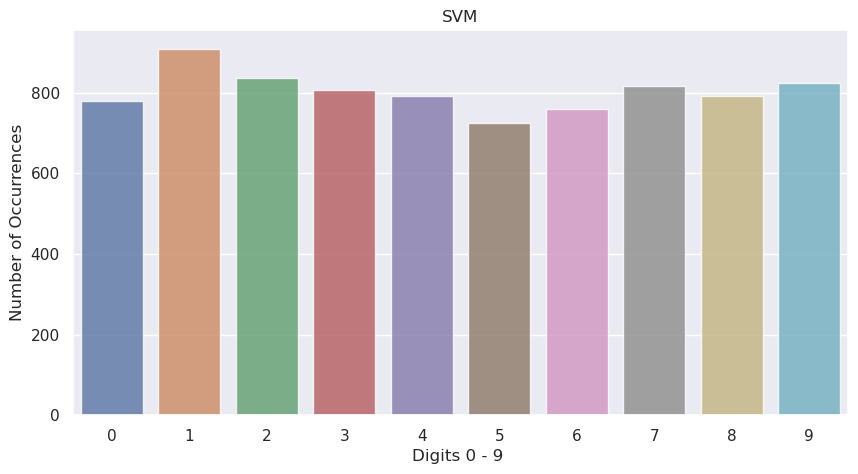

In [12]:
import seaborn as sns

digit_count  = digits['label'].value_counts()
digit_count = digit_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(x= digit_count.index, y=digit_count.values, alpha=0.8)
plt.title('SVM')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Digits 0 - 9 ', fontsize=12)
plt.show()

### SVC(kernel='linear')

2. Select model and its parameters:

In [13]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1E10)

3. Build the model (.fit):

In [14]:
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

5. Apply the model to the test data (.predict)

In [15]:
from sklearn import metrics 
y_pred = model.predict(X_test)

6. Estimate performance (accuracy score)

In [16]:
print(metrics.accuracy_score(y_test, y_pred))

1.0


Get the margin from the `model` class:

In [17]:
# Get the weight vector (coef_)
w = model.coef_[0]

# Calculate the norm of the weight vector
w_norm = np.linalg.norm(w)

# Calculate the margin
margin = 1 / w_norm

print(f"Margin: {margin}")

Margin: 322.21258470484497


### SVC(kernel='rbf')

2. Select model and its parameters:

In [18]:
model = SVC(kernel='rbf', C=1E10)

3. Build the model (.fit):

In [19]:
model.fit(X, y)

SVC(C=10000000000.0)

5. Apply the model to the test data (.predict)

In [20]:
y_pred = model.predict(X_test)

6. Estimate performance (accuracy score)

In [21]:
print(metrics.accuracy_score(y_test, y_pred))

1.0


## Answers to questions

**How does the maximum margin better generalize the SVM algorithm?**

A maximum margin does two major things:

1. Prevents the model from overfitting. If the maximum margin is large, this means that the model's decision boundary is less sensitive to small changes in the training data, which reduces model sensitivity.

2. Maximizing the margin also helps the SVM from misclassifying data points that are far away from the decision boundary, leading to the model's ability to classify data points that would otherwise be misclassified if the SVM's decision boundary was smaller.
